# importing all the necessary libraries

In [519]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
%matplotlib inline

In [321]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E821-AA7B

 Directory of C:\Users\venky\downloads\datasets\Telecom churn

10/30/2020  02:39 PM    <DIR>          .
10/30/2020  02:39 PM    <DIR>          ..
10/30/2020  11:21 AM    <DIR>          .ipynb_checkpoints
10/27/2020  05:22 PM           491,458 churn_data.csv
10/27/2020  05:22 PM           188,615 customer_data.csv
10/27/2020  05:22 PM           466,484 internet_data.csv
10/30/2020  12:55 PM         1,184,689 Logistic+Regression+-+Telecom+Churn+Case+Study.ipynb
10/27/2020  05:22 PM             1,490 Telecom Churn Data Dictionary.csv
10/30/2020  02:39 PM         1,116,587 Telecom_churn_case-study_LogisticRegression.ipynb
               6 File(s)      3,449,323 bytes
               3 Dir(s)  61,599,199,232 bytes free


# reading the data

In [322]:
churn=pd.read_csv('churn_data.csv')

In [323]:
churn.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No


In [324]:
customer=pd.read_csv('customer_data.csv')

In [325]:
customer.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


In [326]:
internet=pd.read_csv('internet_data.csv')
internet.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


In [327]:
# all 3 Dataframes realtes to same customer. so we can merge all 3 Dataframes w.r.t customerID

In [328]:
df=pd.merge(pd.merge(churn,customer,on='customerID'),internet,on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


## getting the shape and information of the merged Dataframe

In [329]:
df.shape

(7043, 21)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [331]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [332]:
# seems like there are no na/missing values
# but datatypes need to be changed

# Data preparation

## converting binary variables (Yes and No to 1 and 0)

In [333]:
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No


In [334]:
binary_variables=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
df[binary_variables]=df[binary_variables].replace({'Yes':1,'No':0})

## converting category varlables to numberical variables through one hot encoding and label concoding

### converting nominal category variables  to numerical data by using creating one hot encoding (dummies)

In [335]:
nominal_cat_vars=['Contract','PaymentMethod','gender','InternetService']
# i am not converting multiplelines,online security and other data because i can see No and yes in those columns. so we
# need to give prefix for those as column names
df=df.join(pd.get_dummies(df[nominal_cat_vars],drop_first=True))

In [336]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [337]:
# dropping the original columns

In [338]:
df.drop(columns=['Contract','PaymentMethod','gender','InternetService'],axis=1,inplace=True)

In [339]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [340]:
# if i drop first column i will loose big chunk of data, instead i will drop No phone service

In [341]:
df=df.join(pd.get_dummies(df['MultipleLines'],prefix='MultipleLines'))

In [342]:
df.drop(columns=['MultipleLines_No phone service','MultipleLines'],axis=1,inplace=True)

In [343]:
df=df.join(pd.get_dummies(df['OnlineSecurity'],prefix='OnlineSecurity'))
df.drop(columns=['OnlineSecurity_No internet service','OnlineSecurity'],axis=1,inplace=True)
df=df.join(pd.get_dummies(df['DeviceProtection'],prefix='DeviceProtection'))
df.drop(columns=['DeviceProtection_No internet service','DeviceProtection'],axis=1,inplace=True)
df=df.join(pd.get_dummies(df['TechSupport'],prefix='TechSupport'))
df.drop(columns=['TechSupport_No internet service','TechSupport'],axis=1,inplace=True)
df=df.join(pd.get_dummies(df['OnlineBackup'],prefix='OnlineBackup'))
df.drop(columns=['OnlineBackup_No internet service','OnlineBackup'],axis=1,inplace=True)
df=df.join(pd.get_dummies(df['StreamingTV'],prefix='StreamingTV'))
df.drop(columns=['StreamingTV_No internet service','StreamingTV'],axis=1,inplace=True)
df=df.join(pd.get_dummies(df['StreamingMovies'],prefix='StreamingMovies'))
df.drop(columns=['StreamingMovies_No internet service','StreamingMovies'],axis=1,inplace=True)

In [344]:
df.head(2)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0


In [345]:
df.shape

(7043, 32)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [347]:
df['TotalCharges'][~(df['TotalCharges']==' ')]=df['TotalCharges'][~(df['TotalCharges']==' ')].astype(float)

In [348]:
df['TotalCharges'][(df['TotalCharges']==' ')].count()

11

In [349]:
(11/7043)*100

0.1561834445548772

In [350]:
# as there are 11 blank values in Total charges  which is 0.2 so i will drop those

In [351]:
df=df[~(df['TotalCharges']==' ')]

In [352]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

## checking for outliers

In [354]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [355]:
df[['tenure','MonthlyCharges','TotalCharges']].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000


In [356]:
# as there is graduall increase in all of the variables i can say there are no outliers

# Splitting the data in to train and test

In [357]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [358]:
df_train.shape,df_test.shape

((4922, 32), (2110, 32))

# Feature Scaling

In [359]:
# MinMaxScaler will preserves the origial shape of data and it disrupts the data very least
# StandardScaler is to be used when we need Normal distribution with mean 0 and std 1

In [360]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

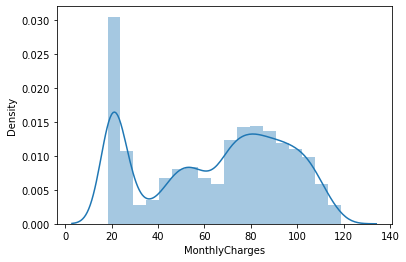

In [361]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

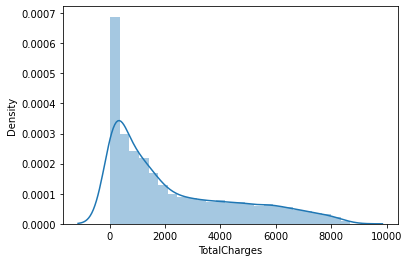

In [362]:
sns.distplot(df['TotalCharges'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

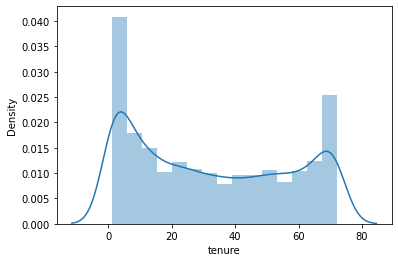

In [363]:
sns.distplot(df['tenure'])

In [364]:
scaler=MinMaxScaler()

In [365]:
df_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(df_train[['tenure','MonthlyCharges','TotalCharges']])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

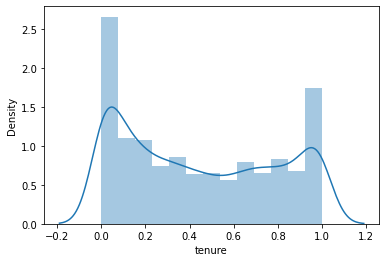

In [366]:
sns.distplot(df_train['tenure'])

### checking for distribution distortion if we use StandardScaler

In [367]:
test_,train_=train_test_split(df['tenure'],train_size=0.7,random_state=100)

In [368]:
test_std=StandardScaler()

In [369]:
test_tenure=test_std.fit_transform(test_.values.reshape(-1,1))

<AxesSubplot:ylabel='Density'>

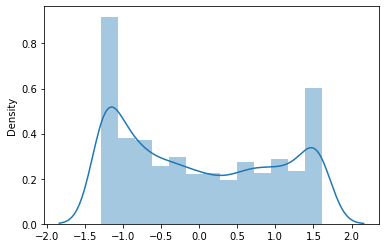

In [370]:
sns.distplot(test_tenure)

In [371]:
df_train['tenure'].mean(),df_train['tenure'].std()

(0.44390806439612884, 0.3451345951402378)

In [372]:
test_tenure.mean(),test_tenure.std()

(7.506749747973427e-17, 1.0)

In [373]:
df['tenure'].mean(),df['tenure'].std()

(32.421786120591584, 24.545259709263256)

# checking the churn rate

In [374]:
df_train['Churn'].mean()

0.26147907354733846

In [375]:
# Churn rate of 27% is not good or bad. if this is very low like 5% if we give all will not churn as our prediction also 
# ok for 95% times.

# checking correlations with heatmap

<AxesSubplot:>

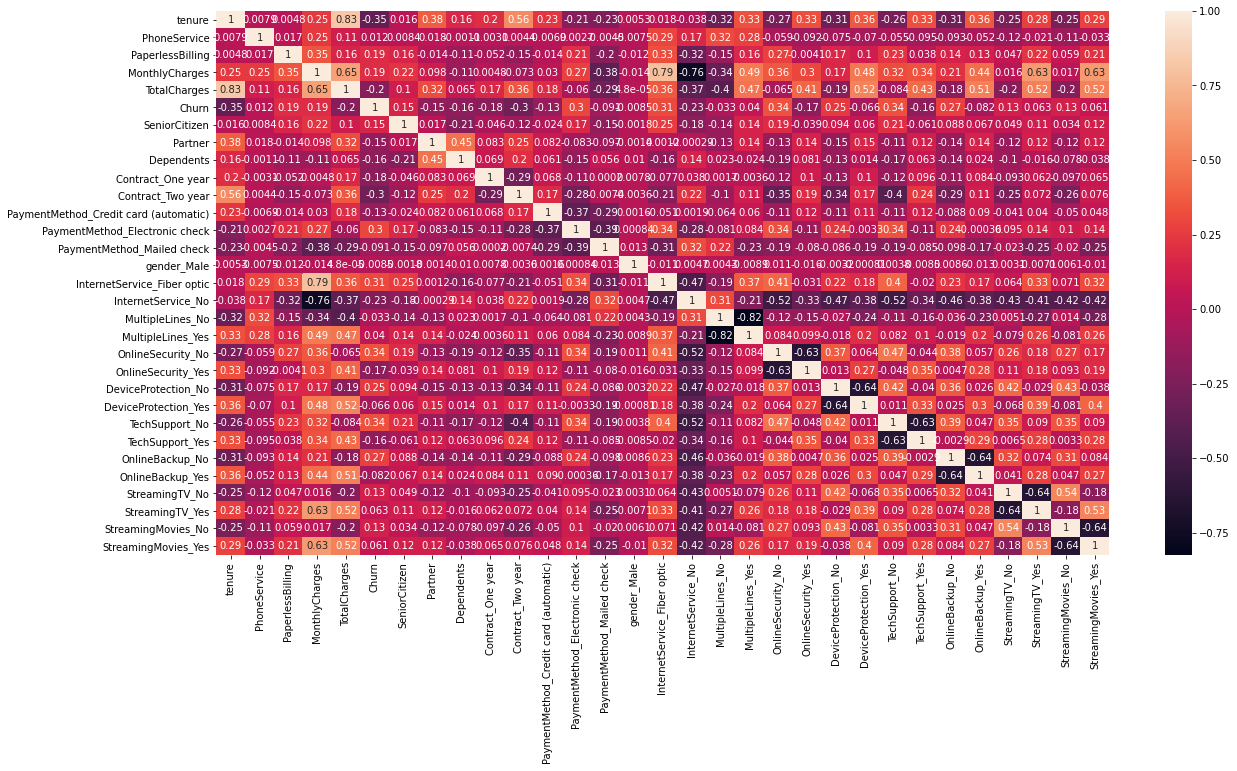

In [376]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)

## dropping highly correlated features

In [377]:
df_train=df_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1)

In [378]:
df_test=df_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1)

<AxesSubplot:>

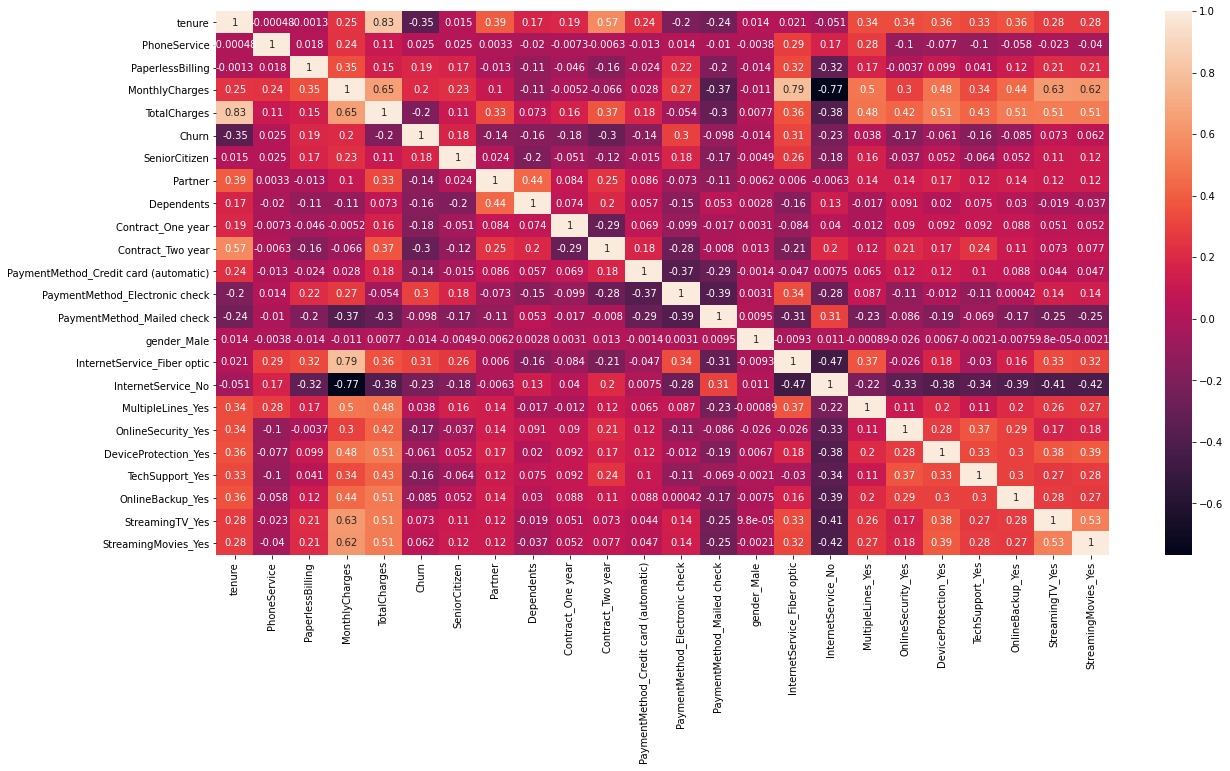

In [379]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True)

# Model building

In [380]:
df_train.head(2)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,OnlineBackup_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,9342-VNIMQ,0.450704,1,1,0.362189,0.189979,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
5790,0980-PVMRC,0.549296,0,1,0.324378,0.232831,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1


In [381]:
not_req_columns=['customerID','Churn']
req_columns=[ele for ele in list(df_train.columns) if ele not in not_req_columns]

In [382]:
x=df_train[req_columns]

In [383]:
x=sm.add_constant(x)

In [384]:
x.head(2)

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,OnlineBackup_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0.450704,1,1,0.362189,0.189979,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
5790,1.0,0.549296,0,1,0.324378,0.232831,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1


In [385]:
y=df_train['Churn']

## buidling model by using Logit function

In [386]:
logm1=sm.Logit(y,x).fit()
logm1.summary()

Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Fri, 30 Oct 2020   Pseudo R-squ.:                  0.2912
Time:                        14:40:14   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6551      0.337      1.945      0.052      -0.005       1.315
tenure                                   -4.3963      0.549     -8.015      0.000      -5.471      -3.321
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -7.2877      3.876     -1.880      0.060     -14.884       0.309
TotalCharges                              2.8018      0.756      3.705      0.000       1.320       4.284
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

## by using GLM generalised linear model

In [387]:
log1=sm.GLM(y,x,families=sm.families.Binomial()).fit()
log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                         0.13753
Method:                          IRLS   Log-Likelihood:                -2089.5
Date:                Fri, 30 Oct 2020   Deviance:                       673.60
Time:                        14:40:14   Pearson chi2:                     674.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4124      0.045      9.096      0.000       0.324       0.501
tenure                                   -0.1271      0.042     -3.004      0.003      -0.210      -0.044
PhoneService                              0.1105      0.106      1.039      0.299      -0.098       0.319
PaperlessBilling                          0.0412      0.012      3.483      0.000       0.018       0.064
MonthlyCharges                           -0.5899      0.523     -1.127      0.260      -1.616       0.436
TotalCharges                             -0.4325      0.067     -6.491      0.000      -0.563      -0.302
SeniorCitizen                             0.0758      0.015      4.909      0.000       0.046       0.106
Partner                                   0.0046      0.013      0.357      0.721      -0.020       0.030
Dependents                               -0.0183      0.013     -1.361      0.174      -0.045       0.008
Contract_One year                        -0.1026      0.016     -6.267      0.000      -0.135      -0.071
Contract_Two year                        -0.0555      0.020     -2.742      0.006      -0.095      -0.016
PaymentMethod_Credit card (automatic)    -0.0242      0.016     -1.512      0.131      -0.056       0.007
PaymentMethod_Electronic check            0.0485      0.016      3.078      0.002       0.018       0.079
PaymentMethod_Mailed check               -0.0281      0.017     -1.640      0.101      -0.062       0.005
gender_Male                              -0.0055      0.011     -0.521      0.603      -0.026       0.015
InternetService_Fiber optic               0.3227      0.130      2.474      0.013       0.067       0.578
InternetService_No                       -0.3163      0.132     -2.395      0.017      -0.575      -0.057
MultipleLines_Yes                         0.0749      0.029      2.583      0.010       0.018       0.132
OnlineSecurity_Yes                       -0.0136      0.030     -0.460      0.645      -0.072       0.044
DeviceProtection_Yes                      0.0312      0.030      1.055      0.292      -0.027       0.089
TechSupport_Yes                          -0.0227      0.030     -0.769      0.442      -0.081       0.035
OnlineBackup_Yes                          0.0084      0.029      0.288      0.774      -0.049       0.065
StreamingTV_Yes                           0.1196      0.054      2.227      0.026       0.014       0.225
StreamingMovies_Yes                       0.1014      0.054      1.890      0.059      -0.004       0.207
=========================================================================================================
"""

# feature selection using RFE

In [388]:
logreg=LogisticRegression()

In [389]:
rfe=RFE(logreg,15)
rfe=rfe.fit(x,y)

## checking which features are selected and their rank

In [390]:
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('const', False, 10),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 5),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 2),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('OnlineBackup_Yes', False, 4),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 3)]

In [391]:
x.columns[~rfe.support_]

Index(['const', 'MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'DeviceProtection_Yes',
       'OnlineBackup_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [392]:
## assessing this features with statsmodels again

In [393]:
x_col=x.columns[rfe.support_]

In [394]:
x=x[x_col]

In [395]:
x=sm.add_constant(x)

In [396]:
loglm2=sm.GLM(y,x,family=sm.families.Binomial()).fit()
loglm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Fri, 30 Oct 2020   Deviance:                       4023.5
Time:                        14:40:15   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2316      0.172      1.350      0.177      -0.105       0.568
tenure                                   -4.4585      0.532     -8.381      0.000      -5.501      -3.416
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              2.7191      0.717      3.794      0.000       1.315       4.124
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
=========================================================================================================
"""

In [397]:
## getting predicted values for train

In [398]:
y_train_pred=loglm2.predict(x)

In [399]:
y_train_pred[:10]

879     0.225111
5790    0.274893
6498    0.692126
880     0.504909
2784    0.645261
3874    0.417544
5387    0.420131
6623    0.809427
4465    0.223211
5364    0.512246
dtype: float64

## creating DataFrame of  Churn and the probabilities of churn

In [400]:
y_train_pred_final=pd.DataFrame(columns=['Churn','Prob','CustID'])

In [401]:
y_train_pred_final['Churn']=y
y_train_pred_final['Prob']=y_train_pred
y_train_pred_final['CustID']=y_train_pred.index

In [402]:
y_train_pred_final.head()

,Churn,Prob,CustID
879,0,0.225111,879
5790,0,0.274893,5790
6498,1,0.692126,6498
880,1,0.504909,880
2784,1,0.645261,2784


## creating a DataFrame with threshold as 0.5

In [403]:
y_train_pred_final['predicted']=y_train_pred_final['Prob'].apply(lambda x: 1 if x >0.5 else 0)

In [404]:
y_train_pred_final.head()

,Churn,Prob,CustID,predicted
879,0,0.225111,879,0
5790,0,0.274893,5790,0
6498,1,0.692126,6498,1
880,1,0.504909,880,1
2784,1,0.645261,2784,1


In [405]:
# since we choose 0.5 as threshold to classify 0 & 1 we might have done some wrong classification
# we might have classified 0 as 1 or 1 as 0

## confusion matrix

In [406]:
confusion=confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['predicted'])
confusion

array([[3270,  365],
       [ 579,  708]], dtype=int64)

In [407]:
accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['predicted'])

0.8082080455099553

## checking VIF's

In [416]:
x=x.iloc[:,1:]

In [417]:
pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index=x.columns)

tenure                                   15.542000
PhoneService                              7.882391
PaperlessBilling                          2.680954
TotalCharges                             15.346256
SeniorCitizen                             1.322587
Contract_One year                         2.032549
Contract_Two year                         3.412878
PaymentMethod_Credit card (automatic)     1.471571
PaymentMethod_Mailed check                1.642730
InternetService_Fiber optic               4.043864
InternetService_No                        3.246928
MultipleLines_Yes                         2.532799
OnlineSecurity_Yes                        1.975780
TechSupport_Yes                           2.111733
StreamingTV_Yes                           2.414008
dtype: float64

In [418]:
# removing PhoneService and re run the whole setup again

In [420]:
x_sm=sm.add_constant(x)

In [426]:
remove_PhoneService=x_sm.pop('PhoneService')

In [427]:
x_sm

,const,tenure,PaperlessBilling,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes
879,1.0,0.450704,1,0.189979,0,0,0,0,0,0,0,1,0,0,0
5790,1.0,0.549296,1,0.232831,0,0,0,0,0,0,0,0,0,0,1
6498,1.0,0.000000,1,0.007322,0,0,0,0,0,1,0,0,0,0,0
880,1.0,0.126761,1,0.118216,0,0,0,0,0,1,0,0,1,1,1
2784,1.0,0.042254,1,0.043556,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.0,0.619718,1,0.138213,0,1,0,1,0,0,1,1,0,0,0
3934,1.0,0.126761,0,0.045304,0,1,0,0,1,0,0,0,1,1,0
5964,1.0,0.676056,0,0.346794,0,0,0,0,0,0,0,0,1,1,0
6947,1.0,0.943662,1,0.779101,0,1,0,1,0,1,0,1,0,0,1


In [428]:
loglm3=sm.GLM(y,x_sm,family=sm.families.Binomial()).fit()
loglm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Fri, 30 Oct 2020   Deviance:                       4034.0
Time:                        14:46:44   Pearson chi2:                 5.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1650      0.121     -1.366      0.172      -0.402       0.072
tenure                                   -4.0967      0.520     -7.884      0.000      -5.115      -3.078
PaperlessBilling                          0.3425      0.089      3.829      0.000       0.167       0.518
TotalCharges                              2.2683      0.703      3.225      0.001       0.890       3.647
SeniorCitizen                             0.4457      0.099      4.486      0.000       0.251       0.640
Contract_One year                        -0.6905      0.128     -5.411      0.000      -0.941      -0.440
Contract_Two year                        -1.2646      0.211     -6.002      0.000      -1.678      -0.852
PaymentMethod_Credit card (automatic)    -0.3785      0.113     -3.363      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3769      0.111     -3.407      0.001      -0.594      -0.160
InternetService_Fiber optic               0.6241      0.111      5.645      0.000       0.407       0.841
InternetService_No                       -1.0940      0.158     -6.919      0.000      -1.404      -0.784
MultipleLines_Yes                         0.1607      0.094      1.712      0.087      -0.023       0.345
OnlineSecurity_Yes                       -0.4094      0.102     -4.016      0.000      -0.609      -0.210
TechSupport_Yes                          -0.4085      0.101     -4.025      0.000      -0.607      -0.210
StreamingTV_Yes                           0.3077      0.094      3.277      0.001       0.124       0.492
=========================================================================================================
"""

In [431]:
y_train_pred=loglm3.predict(x_sm)

In [433]:
y_train_pred_final1=pd.DataFrame(columns=['Churn','Prob','CustID'])
y_train_pred_final1['Churn']=y
y_train_pred_final1['Prob']=y_train_pred
y_train_pred_final1['CustID']=y_train_pred.index

In [434]:
y_train_pred_final1.head()

,Churn,Prob,CustID
879,0,0.254032,879
5790,0,0.224977,5790
6498,1,0.693865,6498
880,1,0.510087,880
2784,1,0.651724,2784


In [435]:
y_train_pred_final1['predicted']=y_train_pred_final1['Prob'].apply(lambda x: 1 if x >0.5 else 0)

In [436]:
y_train_pred_final1.head()

,Churn,Prob,CustID,predicted
879,0,0.254032,879,0
5790,0,0.224977,5790,0
6498,1,0.693865,6498,1
880,1,0.510087,880,1
2784,1,0.651724,2784,1


In [437]:
accuracy_score(y_train_pred_final1['Churn'],y_train_pred_final1['predicted'])

0.8051605038602194

In [440]:
x_sm=x_sm.iloc[:,1:]

In [441]:
pd.Series([variance_inflation_factor(x_sm.values,i) for i in range(x_sm.shape[1])],index=x_sm.columns)

tenure                                   15.301271
PaperlessBilling                          2.474154
TotalCharges                             15.195300
SeniorCitizen                             1.319226
Contract_One year                         2.025401
Contract_Two year                         3.409662
PaymentMethod_Credit card (automatic)     1.445918
PaymentMethod_Mailed check                1.506267
InternetService_Fiber optic               2.989897
InternetService_No                        2.438417
MultipleLines_Yes                         2.398909
OnlineSecurity_Yes                        1.902312
TechSupport_Yes                           2.041870
StreamingTV_Yes                           2.394793
dtype: float64

In [442]:
# dropping TotalCharges

In [445]:
req_cols=x_sm.columns.drop('TotalCharges')

In [448]:
x_sm=sm.add_constant(x_sm[req_cols])

In [450]:
loglm4=sm.GLM(y,x_sm).fit()
loglm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13940
Method:                          IRLS   Log-Likelihood:                -2127.8
Date:                Fri, 30 Oct 2020   Deviance:                       684.18
Time:                        14:56:17   Pearson chi2:                     684.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4411      0.016     27.175      0.000       0.409       0.473
tenure                                   -0.3708      0.024    -15.172      0.000      -0.419      -0.323
PaperlessBilling                          0.0445      0.012      3.743      0.000       0.021       0.068
SeniorCitizen                             0.0823      0.015      5.381      0.000       0.052       0.112
Contract_One year                        -0.1104      0.016     -6.750      0.000      -0.142      -0.078
Contract_Two year                        -0.0522      0.020     -2.594      0.009      -0.092      -0.013
PaymentMethod_Credit card (automatic)    -0.0536      0.014     -3.849      0.000      -0.081      -0.026
PaymentMethod_Mailed check               -0.0712      0.015     -4.829      0.000      -0.100      -0.042
InternetService_Fiber optic               0.1291      0.014      9.174      0.000       0.102       0.157
InternetService_No                       -0.1496      0.019     -7.927      0.000      -0.187      -0.113
MultipleLines_Yes                         0.0267      0.012      2.135      0.033       0.002       0.051
OnlineSecurity_Yes                       -0.0704      0.014     -5.030      0.000      -0.098      -0.043
TechSupport_Yes                          -0.0753      0.014     -5.342      0.000      -0.103      -0.048
StreamingTV_Yes                           0.0438      0.013      3.385      0.001       0.018       0.069
=========================================================================================================
"""

In [451]:
y_pred=loglm4.predict(x_sm)

In [455]:
y_train_pred=pd.DataFrame({'Churn':y,'Prob':y_pred,'custID':y_pred.index})

In [456]:
y_train_pred.head()

,Churn,Prob,custID
879,0,0.345116,879
5790,0,0.325688,5790
6498,1,0.614704,6498
880,1,0.465858,880
2784,1,0.567556,2784


In [460]:
y_train_pred['predicted']=y_train_pred['Prob'].apply(lambda x: 1 if x>0.5 else 0)

In [461]:
y_train_pred.head()

,Churn,Prob,custID,predicted
879,0,0.345116,879,0
5790,0,0.325688,5790,0
6498,1,0.614704,6498,1
880,1,0.465858,880,0
2784,1,0.567556,2784,1


In [462]:
accuracy_score(y_train_pred['Churn'],y_train_pred['predicted'])

0.8019097927671678

In [467]:
x_sm=x_sm.iloc[:,1:]

In [468]:
pd.Series([variance_inflation_factor(x_sm.values,i) for i in range(x_sm.shape[1])],index=x_sm.columns)

tenure                                   6.406870
PaperlessBilling                         2.404895
SeniorCitizen                            1.317015
Contract_One year                        2.024329
Contract_Two year                        3.408710
PaymentMethod_Credit card (automatic)    1.443844
PaymentMethod_Mailed check               1.505473
InternetService_Fiber optic              2.601945
InternetService_No                       2.046544
MultipleLines_Yes                        2.315614
OnlineSecurity_Yes                       1.870890
TechSupport_Yes                          2.000865
StreamingTV_Yes                          2.212189
dtype: float64

In [475]:
x_sm=x_sm[x_sm.columns.drop('tenure')]

In [476]:
loglm5=sm.GLM(y,sm.add_constant(x_sm)).fit()
loglm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.14591
Method:                          IRLS   Log-Likelihood:                -2240.6
Date:                Fri, 30 Oct 2020   Deviance:                       716.27
Time:                        15:25:37   Pearson chi2:                     716.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3925      0.016     24.111      0.000       0.361       0.424
PaperlessBilling                          0.0382      0.012      3.140      0.002       0.014       0.062
SeniorCitizen                             0.0663      0.016      4.247      0.000       0.036       0.097
Contract_One year                        -0.2214      0.015    -14.797      0.000      -0.251      -0.192
Contract_Two year                        -0.2369      0.016    -14.451      0.000      -0.269      -0.205
PaymentMethod_Credit card (automatic)    -0.0638      0.014     -4.481      0.000      -0.092      -0.036
PaymentMethod_Mailed check               -0.0331      0.015     -2.226      0.026      -0.062      -0.004
InternetService_Fiber optic               0.1183      0.014      8.228      0.000       0.090       0.147
InternetService_No                       -0.1552      0.019     -8.037      0.000      -0.193      -0.117
MultipleLines_Yes                        -0.0197      0.012     -1.592      0.111      -0.044       0.005
OnlineSecurity_Yes                       -0.1054      0.014     -7.468      0.000      -0.133      -0.078
TechSupport_Yes                          -0.0908      0.014     -6.314      0.000      -0.119      -0.063
StreamingTV_Yes                           0.0224      0.013      1.704      0.088      -0.003       0.048
=========================================================================================================
"""

In [477]:
pd.Series([variance_inflation_factor(x_sm.values,i) for i in range(x_sm.shape[1])],index=x_sm.columns)

PaperlessBilling                         2.360763
SeniorCitizen                            1.305001
Contract_One year                        1.581925
Contract_Two year                        2.154235
PaymentMethod_Credit card (automatic)    1.432148
PaymentMethod_Mailed check               1.489589
InternetService_Fiber optic              2.549402
InternetService_No                       2.006959
MultipleLines_Yes                        2.160906
OnlineSecurity_Yes                       1.780804
TechSupport_Yes                          1.973576
StreamingTV_Yes                          2.167712
dtype: float64

In [479]:
y_final_pred=loglm5.predict(sm.add_constant(x_sm))

In [480]:
y_final_pred

879     0.410943
5790    0.453081
6498    0.549008
880     0.375234
2784    0.480645
          ...   
79     -0.029454
3934   -0.058214
5964    0.196299
6947    0.266473
5649    0.204212
Length: 4922, dtype: float64

In [481]:
df1=pd.DataFrame({'Churn':y,'Prob_churn':y_final_pred,'custID':y_final_pred.index})
df1.head()

,Churn,Prob_churn,custID
879,0,0.410943,879
5790,0,0.453081,5790
6498,1,0.549008,6498
880,1,0.375234,880
2784,1,0.480645,2784


In [487]:
df1['Predicted']=df1['Prob_churn'].apply(lambda x:1 if x>0.5 else 0)

In [488]:
df1.head()

,Churn,Prob_churn,custID,Predicted
879,0,0.410943,879,0
5790,0,0.453081,5790,0
6498,1,0.549008,6498,1
880,1,0.375234,880,0
2784,1,0.480645,2784,0


In [489]:
accuracy_score(df1['Churn'],df1['Predicted'])

0.7903291344981714

In [505]:
c=confusion_matrix(df1['Churn'],df1['Predicted'])
c

array([[3274,  361],
       [ 671,  616]], dtype=int64)

In [509]:
tn=c[0,0]
tp=c[1,1]
fn=c[1,0]
fp=c[0,1]

In [513]:
sensi=tp/(tp+fn)
spec=tn/(tn+fp)

In [514]:
sensi

0.47863247863247865

In [516]:
spec

0.900687757909216

In [498]:
res.intercept_

array([-0.58001279])

# ROC curve

In [525]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=roc_curve(actual,probs,drop_intermediate=False)
    auc_score=roc_auc_score(actual,probs)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr,tpr)

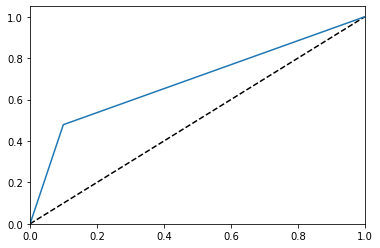

In [526]:
draw_roc(df1['Churn'],df1['Predicted'])

In [527]:
df1

,Churn,Prob_churn,custID,Predicted
879,0,0.410943,879,0
5790,0,0.453081,5790,0
6498,1,0.549008,6498,1
880,1,0.375234,880,0
2784,1,0.480645,2784,0
...,...,...,...,...
79,0,-0.029454,79,0
3934,0,-0.058214,3934,0
5964,0,0.196299,5964,0
6947,0,0.266473,6947,0


In [547]:
num=[float(i)/10 for i in range(10)]
for i in num:
    df1[i]=df1['Prob_churn'].apply(lambda x:1 if x>i else 0)

In [548]:
df1

,Churn,Prob_churn,custID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.410943,879,0,1,1,1,1,1,0,0,0,0,0
5790,0,0.453081,5790,0,1,1,1,1,1,0,0,0,0,0
6498,1,0.549008,6498,1,1,1,1,1,1,1,0,0,0,0
880,1,0.375234,880,0,1,1,1,1,0,0,0,0,0,0
2784,1,0.480645,2784,0,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,-0.029454,79,0,0,0,0,0,0,0,0,0,0,0
3934,0,-0.058214,3934,0,0,0,0,0,0,0,0,0,0,0
5964,0,0.196299,5964,0,1,1,0,0,0,0,0,0,0,0
6947,0,0.266473,6947,0,1,1,1,0,0,0,0,0,0,0


In [550]:
df1['test']=df1['Prob_churn'].apply(lambda x:1 if x>0.5 else 0)

In [551]:
df1.head()

,Churn,Prob_churn,custID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,test
879,0,0.410943,879,0,1,1,1,1,1,0,0,0,0,0,0
5790,0,0.453081,5790,0,1,1,1,1,1,0,0,0,0,0,0
6498,1,0.549008,6498,1,1,1,1,1,1,1,0,0,0,0,1
880,1,0.375234,880,0,1,1,1,1,0,0,0,0,0,0,0
2784,1,0.480645,2784,0,1,1,1,1,1,0,0,0,0,0,0


In [554]:
accuracy_score(df1['Churn'],df1['Predicted'])

0.7903291344981714